In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import sys
import pandas as pd
import pickle

root_path = os.environ['FCLA_ROOT']
data_path = os.environ['DATA_PATH']
sys.path.append(os.path.join(root_path,'scripts'))

from mergeResults import *

def get_result(folder, alg):
    folder1 = "geometric_with_coords"
    path1 = os.path.join(data_path, folder1, folder, "solutions", alg)
    results = load_results(path1, os.path.join(data_path,folder1,folder))
    return results

In [80]:
def plot_all(dirname,expname,gurobi=False, fcla=False,
             log=True, sortby="vcount",xlabel="Network size [Nodes]"):
    if (gurobi):
        results15 = load_results(os.path.join(data_path, "geometric_with_coords", dirname, "solutions", "gurobi"), 
                           os.path.join(data_path,'geometric_with_coords',dirname))
    if (fcla):
        results15_fcla = load_results(os.path.join(data_path, "geometric_with_coords", dirname, "solutions", "fcla"), 
                                   os.path.join(data_path,'geometric_with_coords',dirname))
    results15_fcla_l0 = load_results(os.path.join(data_path, "geometric_with_coords", dirname, "solutions", "fcla_l0"), 
                               os.path.join(data_path,'geometric_with_coords',dirname))
    results15_hilbert = load_results(os.path.join(data_path, "geometric_with_coords", dirname, "solutions", "hilbert"), 
                               os.path.join(data_path,'geometric_with_coords',dirname))
    
    fig, (ax1, ax2) = plt.subplots(2,figsize=(5, 5), dpi=300)
    ax1.set_yscale("log", nonposx='clip')
    if (log):
        ax1.set_xscale("log", nonposx='clip')
    if (fcla):
        results15_fcla = results15_fcla.sort_values(by=sortby)
    if (gurobi):
        results15 = results15.sort_values(by=sortby)
    results15_fcla_l0 = results15_fcla_l0.sort_values(by=sortby)
    results15_hilbert = results15_hilbert.sort_values(by=sortby)
    if (fcla):
        ax1.plot(results15_fcla[sortby],results15_fcla['runtime'], 'k.-', label="WMA BF")
    if (gurobi):
        ax1.plot(results15[sortby],results15['runtime'], 'g^--', label="Gurobi")
    results15_fcla_l0 = results15_fcla_l0[results15_fcla_l0['objective'].notnull()]
    ax1.plot(results15_fcla_l0[sortby],results15_fcla_l0['runtime'], 'ro:',label="WMA")
    ax1.plot(results15_hilbert[sortby],results15_hilbert['runtime'], 'bs-',label="Hilbert")
    ax1.set_ylabel("Runtime [Sec]")
#     plt.title(expname)
#     plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    ax1.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
              ncol=3, mode="expand", borderaxespad=0.)
    plt.setp(ax1.get_xticklabels(), visible=False)
    
#     fig, ax = plt.subplots(figsize=(4, 3), dpi=300)
#     ax2.set_yscale("log", nonposx='clip')
    
    if (log):
        ax2.set_xscale("log", nonposx='clip')
    if (fcla):
        results15_fcla = results15_fcla.sort_values(by=sortby)
    if (gurobi):
        results15 = results15.sort_values(by=sortby)
    results15_fcla_l0 = results15_fcla_l0.sort_values(by=sortby)
    results15_hilbert = results15_hilbert.sort_values(by=sortby)
    if (fcla):
        ax2.plot(results15_fcla[sortby],results15_fcla['objective'], 'k.-',label="WMA BF")
        
    #filter nan 
#     notnanind = results15_hilbert['objective'].notnull()
#     obj =results15_hilbert['objective']
#     obj= obj[notnanind]
#     ind = results15_fcla_l0[sortby]
#     ind = ind[notnanind]
    ax2.plot(results15_fcla_l0[sortby],results15_fcla_l0['objective'], 'ro:',label="WMA")
    ax2.plot(results15_hilbert[sortby],results15_hilbert['objective'], 'bs-',label="Hilbert")
    if (gurobi):
        ax2.plot(results15[sortby],results15['objective'], 'g^--',label="Gurobi")
    ax2.set_xlabel(xlabel)
    ax2.set_ylabel("Objective")
    if (not log):
        ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax2.ticklabel_format(style='sci', axis='y')

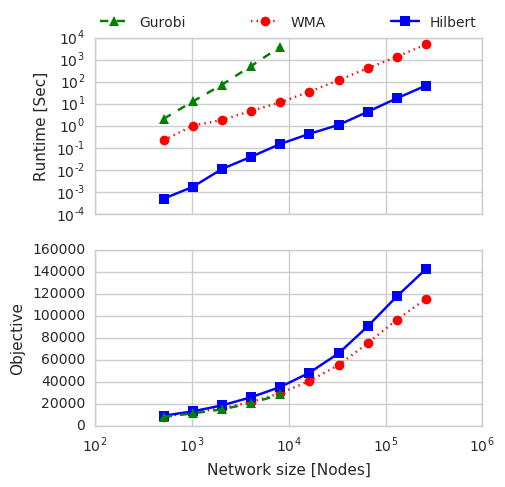

In [47]:
sns.set(style="whitegrid")
#ax2.set_ylim([7000,170000])
plot_all('n_m-n0.10_k-n0.01_c20_connected_d2','',True, False, True,xlabel="Network size [Nodes]")

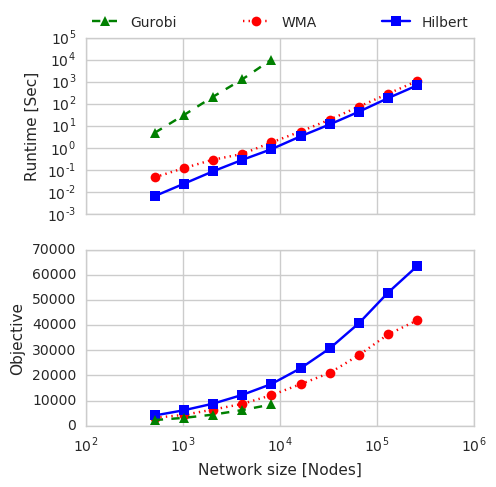

In [50]:
plot_all('n_m-n0.20_k-n0.1_c4_d2','',True, False, True)

/home/alogins/.local/lib/python3.4/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


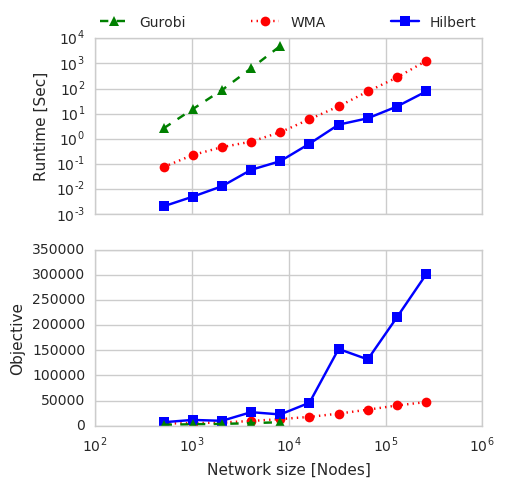

In [82]:
plot_all('n_m-n0.10_k-n0.01_c20_d0.8','',True, False, True)

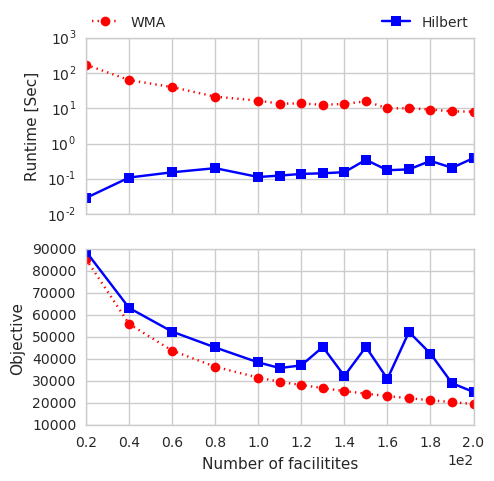

In [81]:
#should be saved as kc_n10000m1000cl40_uniform - name overlap
plot_all('kc_n10000m1000cl40',"",sortby="number of facilities",xlabel="Number of facilitites",log=False)